# Data Collection and Cleaning

In [8]:
import pandas as pd
import numpy as np
import requests
import warnings
from dotenv import load_dotenv
from datetime import datetime
import os
import json
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

load_dotenv()
warnings.simplefilter("ignore", pd.errors.SettingWithCopyError)

## Landslides

In [23]:
landslides = pd.read_excel("../datasets/original/Colombia Lansdslides Table.xlsx")

display(landslides.info())
landslides

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266 entries, 0 to 2265
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Occurrence Date        2266 non-null   datetime64[ns]
 1   Department             2266 non-null   object        
 2   Municipality           2266 non-null   object        
 3   Lat                    2266 non-null   object        
 4   Long                   2266 non-null   object        
 5   Confidence ratio (km)  2266 non-null   object        
 6   Deaths                 2266 non-null   int64         
 7   Trigger                2266 non-null   object        
 8   Source                 2266 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 159.5+ KB


None

,Occurrence Date,Department,Municipality,Lat,Long,Confidence ratio (km),Deaths,Trigger,Source
0,1934-05-30,ANTIOQUIA,ABRIAQUI,6.63,-76.09,9.65,5,Rainfall,CNMM
1,1934-09-29,BOGOTA,BOGOTA,4.63,-74.11,11.6,2,Human activity,HEB
2,1934-11-18,CALDAS,CHINCHINA,4.97,-75.66,5.92,1,Unknown,CNMM
3,1934-11-28,VALLE DEL CAUCA,CALI,3.4,-76.58,13.44,2,Unknown,CNMM
4,1934-11-29,QUINDIO,ARMENIA,4.5,-75.73,6.17,1,Unknown,DESINVENTAR
...,...,...,...,...,...,...,...,...,...
2261,2020-12-01,BOLIVAR,BARRANCO DE LOBA,8.84,-74.28,11.68,3,Human activity,News Report - UNGRD
2262,2020-12-03,RISARALDA,PEREIRA,4.8,-75.8,13.91,1,Unknown,UNGRD
2263,2020-12-12,ANTIOQUIA,SAN LUIS,6,-75.05,0.1,2,Unknown,News Report
2264,2020-12-15,ANTIOQUIA,MEDELLIN,6.25,-75.58,6.5,2,Human activity,News Report


In [24]:
landslides.sort_values(["Lat", "Long"])

,Occurrence Date,Department,Municipality,Lat,Long,Confidence ratio (km),Deaths,Trigger,Source
641,1972-07-26,PUTUMAYO,PUERTO ASIS,0.43,-76.52,29.96,4,Unknown,CTM96 - DESINVENTAR
338,1962-08-16,NARIÑO,IPIALES,0.5,-77.24,22.45,14,Unknown,CNMM
1125,1988-04-22,NARIÑO,IPIALES,0.5,-77.24,22.45,29,Unknown,CNMM
1165,1988-12-03,NARIÑO,IPIALES,0.5,-77.24,22.45,15,Rainfall,DESINVENTAR
1284,1994-08-03,NARIÑO,IPIALES,0.5,-77.24,22.45,2,Unknown,DESINVENTAR
...,...,...,...,...,...,...,...,...,...
1445,2000-04-19,NARIÑO,UNKNOWN,-,-,-,1,Rainfall,DESINVENTAR
1454,2000-07-02,ANTIOQUIA,UNKNOWN,-,-,-,1,Rainfall,DESINVENTAR
1455,2000-08-18,NARIÑO,UNKNOWN,-,-,-,9,Human activity,DESINVENTAR
1513,2004-03-05,CUNDINAMARCA,UNKNOWN,-,-,-,1,Rainfall,DESINVENTAR


In [25]:
landslides = landslides[landslides["Lat"] != "-"]
landslides[["Lat", "Long", "Confidence ratio (km)"]] = landslides[["Lat", "Long", "Confidence ratio (km)"]].astype(float)

display(landslides.info())
landslides

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 0 to 2265
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Occurrence Date        2240 non-null   datetime64[ns]
 1   Department             2240 non-null   object        
 2   Municipality           2240 non-null   object        
 3   Lat                    2240 non-null   float64       
 4   Long                   2240 non-null   float64       
 5   Confidence ratio (km)  2240 non-null   float64       
 6   Deaths                 2240 non-null   int64         
 7   Trigger                2240 non-null   object        
 8   Source                 2240 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 175.0+ KB


None

,Occurrence Date,Department,Municipality,Lat,Long,Confidence ratio (km),Deaths,Trigger,Source
0,1934-05-30,ANTIOQUIA,ABRIAQUI,6.63,-76.09,9.65,5,Rainfall,CNMM
1,1934-09-29,BOGOTA,BOGOTA,4.63,-74.11,11.60,2,Human activity,HEB
2,1934-11-18,CALDAS,CHINCHINA,4.97,-75.66,5.92,1,Unknown,CNMM
3,1934-11-28,VALLE DEL CAUCA,CALI,3.40,-76.58,13.44,2,Unknown,CNMM
4,1934-11-29,QUINDIO,ARMENIA,4.50,-75.73,6.17,1,Unknown,DESINVENTAR
...,...,...,...,...,...,...,...,...,...
2261,2020-12-01,BOLIVAR,BARRANCO DE LOBA,8.84,-74.28,11.68,3,Human activity,News Report - UNGRD
2262,2020-12-03,RISARALDA,PEREIRA,4.80,-75.80,13.91,1,Unknown,UNGRD
2263,2020-12-12,ANTIOQUIA,SAN LUIS,6.00,-75.05,0.10,2,Unknown,News Report
2264,2020-12-15,ANTIOQUIA,MEDELLIN,6.25,-75.58,6.50,2,Human activity,News Report


In [26]:
landslides.describe()

,Occurrence Date,Lat,Long,Confidence ratio (km),Deaths
count,2240,2240.000000,2240.000000,2240.000000,2240.000000
mean,1987-08-02 23:06:38.571428480,5.118714,-75.272795,10.713237,16.127679
min,1934-05-30 00:00:00,0.430000,-78.600000,0.100000,1.000000
25%,1971-04-20 18:00:00,4.410000,-75.860000,6.170000,1.000000
50%,1988-09-17 00:00:00,5.070000,-75.510000,9.460000,2.000000
75%,2008-11-03 18:00:00,6.260000,-74.947500,13.430000,4.000000
max,2020-12-25 00:00:00,12.000000,75.750000,74.660000,21697.000000
std,NaN,1.890475,3.391700,7.528650,460.265346


In [27]:
landslides["Long"] = landslides["Long"].apply(lambda x: x if x <= 0 else -1 * x)

landslides.describe()

,Occurrence Date,Lat,Long,Confidence ratio (km),Deaths
count,2240,2240.000000,2240.000000,2240.000000,2240.000000
mean,1987-08-02 23:06:38.571428480,5.118714,-75.340429,10.713237,16.127679
min,1934-05-30 00:00:00,0.430000,-78.600000,0.100000,1.000000
25%,1971-04-20 18:00:00,4.410000,-75.860000,6.170000,1.000000
50%,1988-09-17 00:00:00,5.070000,-75.510000,9.460000,2.000000
75%,2008-11-03 18:00:00,6.260000,-74.950000,13.430000,4.000000
max,2020-12-25 00:00:00,12.000000,-68.010000,74.660000,21697.000000
std,NaN,1.890475,1.145650,7.528650,460.265346


In [28]:
landslides_recent = landslides[landslides["Occurrence Date"].dt.year >= 2010].reset_index(drop = True)

landslides_recent

,Occurrence Date,Department,Municipality,Lat,Long,Confidence ratio (km),Deaths,Trigger,Source
0,2010-01-10,BOGOTA,BOGOTA,4.63,-74.11,11.60,1,Unknown,HEB
1,2010-02-25,CUNDINAMARCA,VILLETA,5.01,-74.49,6.70,1,Rainfall,UNGRD
2,2010-04-10,TOLIMA,HERVEO,5.11,-75.19,1.52,1,Unknown,UNGRD
3,2010-04-10,VALLE DEL CAUCA,CALI,3.40,-76.58,13.44,1,Unknown,UNGRD
4,2010-04-29,BOGOTA,BOGOTA,4.63,-74.11,11.60,1,Unknown,UNGRD
...,...,...,...,...,...,...,...,...,...
499,2020-12-01,BOLIVAR,BARRANCO DE LOBA,8.84,-74.28,11.68,3,Human activity,News Report - UNGRD
500,2020-12-03,RISARALDA,PEREIRA,4.80,-75.80,13.91,1,Unknown,UNGRD
501,2020-12-12,ANTIOQUIA,SAN LUIS,6.00,-75.05,0.10,2,Unknown,News Report
502,2020-12-15,ANTIOQUIA,MEDELLIN,6.25,-75.58,6.50,2,Human activity,News Report


## Rainfall

In [29]:
rain_yesterday = []
rain_today = []

for i, row in landslides_recent.iterrows():
    start_date = (row["Occurrence Date"] + pd.Timedelta(days=-1)).strftime("%Y-%m-%d")
    end_date = row["Occurrence Date"].strftime("%Y-%m-%d")

    endpoint = "{}/timeline/{},{}/{}/{}".format(
        os.environ.get("WEATHER_URL"),
        row["Lat"],
        row["Long"],
        start_date,
        end_date
    )
    
    params = {
        "unitGroup": "metric",
        "key": os.environ.get("WEATHER_API_KEY")
    }
    
    response = requests.get(endpoint, params)
    result = json.loads(response.text)
    
    rain_yesterday.append(result["days"][0]["precip"])
    rain_today.append(result["days"][1]["precip"])
    
landslides_recent["Rain Yesterday"] = rain_yesterday
landslides_recent["Rain Today"] = rain_today

display(landslides_recent.describe())
landslides_recent

,Occurrence Date,Lat,Long,Confidence ratio (km),Deaths,Rain Yesterday,Rain Today
count,504,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,2014-11-17 09:14:17.142857216,5.009067,-75.277083,9.658313,3.430556,8.609921,8.698810
min,2010-01-10 00:00:00,0.500000,-78.370000,0.100000,1.000000,0.000000,0.000000
25%,2011-09-19 18:00:00,3.132500,-76.145000,4.452500,1.000000,1.300000,1.600000
50%,2014-05-10 00:00:00,5.185000,-75.510000,7.850000,1.000000,5.100000,5.300000
75%,2017-12-05 12:00:00,6.440000,-74.325000,12.575000,3.000000,11.825000,11.600000
max,2020-12-25 00:00:00,11.250000,-68.010000,73.090000,333.000000,88.100000,89.100000
std,NaN,2.203510,1.414380,8.442951,16.055295,11.012548,10.544394


,Occurrence Date,Department,Municipality,Lat,Long,Confidence ratio (km),Deaths,Trigger,Source,Rain Yesterday,Rain Today
0,2010-01-10,BOGOTA,BOGOTA,4.63,-74.11,11.60,1,Unknown,HEB,0.0,0.0
1,2010-02-25,CUNDINAMARCA,VILLETA,5.01,-74.49,6.70,1,Rainfall,UNGRD,2.2,9.7
2,2010-04-10,TOLIMA,HERVEO,5.11,-75.19,1.52,1,Unknown,UNGRD,4.9,18.0
3,2010-04-10,VALLE DEL CAUCA,CALI,3.40,-76.58,13.44,1,Unknown,UNGRD,10.1,23.1
4,2010-04-29,BOGOTA,BOGOTA,4.63,-74.11,11.60,1,Unknown,UNGRD,4.4,16.3
...,...,...,...,...,...,...,...,...,...,...,...
499,2020-12-01,BOLIVAR,BARRANCO DE LOBA,8.84,-74.28,11.68,3,Human activity,News Report - UNGRD,0.0,0.0
500,2020-12-03,RISARALDA,PEREIRA,4.80,-75.80,13.91,1,Unknown,UNGRD,2.6,8.2
501,2020-12-12,ANTIOQUIA,SAN LUIS,6.00,-75.05,0.10,2,Unknown,News Report,0.0,0.0
502,2020-12-15,ANTIOQUIA,MEDELLIN,6.25,-75.58,6.50,2,Human activity,News Report,0.0,0.0


In [30]:
landslides_recent.to_csv("../datasets/checkpoints/rainfall_landslides.csv", index = False, quoting = False)

In [31]:
landslides_recent = pd.read_csv("../datasets/checkpoints/rainfall_landslides.csv")
landslides_recent["Occurrence Date"] = pd.to_datetime(landslides_recent["Occurrence Date"])

display(landslides_recent.describe())
landslides_recent

,Occurrence Date,Lat,Long,Confidence ratio (km),Deaths,Rain Yesterday,Rain Today
count,504,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,2014-11-17 09:14:17.142857216,5.009067,-75.277083,9.658313,3.430556,8.609921,8.698810
min,2010-01-10 00:00:00,0.500000,-78.370000,0.100000,1.000000,0.000000,0.000000
25%,2011-09-19 18:00:00,3.132500,-76.145000,4.452500,1.000000,1.300000,1.600000
50%,2014-05-10 00:00:00,5.185000,-75.510000,7.850000,1.000000,5.100000,5.300000
75%,2017-12-05 12:00:00,6.440000,-74.325000,12.575000,3.000000,11.825000,11.600000
max,2020-12-25 00:00:00,11.250000,-68.010000,73.090000,333.000000,88.100000,89.100000
std,NaN,2.203510,1.414380,8.442951,16.055295,11.012548,10.544394


,Occurrence Date,Department,Municipality,Lat,Long,Confidence ratio (km),Deaths,Trigger,Source,Rain Yesterday,Rain Today
0,2010-01-10,BOGOTA,BOGOTA,4.63,-74.11,11.60,1,Unknown,HEB,0.0,0.0
1,2010-02-25,CUNDINAMARCA,VILLETA,5.01,-74.49,6.70,1,Rainfall,UNGRD,2.2,9.7
2,2010-04-10,TOLIMA,HERVEO,5.11,-75.19,1.52,1,Unknown,UNGRD,4.9,18.0
3,2010-04-10,VALLE DEL CAUCA,CALI,3.40,-76.58,13.44,1,Unknown,UNGRD,10.1,23.1
4,2010-04-29,BOGOTA,BOGOTA,4.63,-74.11,11.60,1,Unknown,UNGRD,4.4,16.3
...,...,...,...,...,...,...,...,...,...,...,...
499,2020-12-01,BOLIVAR,BARRANCO DE LOBA,8.84,-74.28,11.68,3,Human activity,News Report - UNGRD,0.0,0.0
500,2020-12-03,RISARALDA,PEREIRA,4.80,-75.80,13.91,1,Unknown,UNGRD,2.6,8.2
501,2020-12-12,ANTIOQUIA,SAN LUIS,6.00,-75.05,0.10,2,Unknown,News Report,0.0,0.0
502,2020-12-15,ANTIOQUIA,MEDELLIN,6.25,-75.58,6.50,2,Human activity,News Report,0.0,0.0


In [32]:
random_sample = landslides_recent.sample(len(landslides_recent), replace = True, random_state = 1326)
random_sample

,Occurrence Date,Department,Municipality,Lat,Long,Confidence ratio (km),Deaths,Trigger,Source,Rain Yesterday,Rain Today
252,2014-05-11,HUILA,SUAZA,1.94,-75.80,1.24,1,Unknown,UNGRD,8.0,19.7
257,2014-09-09,CALDAS,MARMATO,5.49,-75.60,3.40,1,Human activity,ANM,0.0,0.0
69,2010-12-05,ANTIOQUIA,BELLO,6.36,-75.59,6.87,82,Rainfall,UNGRD,19.3,19.1
253,2014-05-26,TOLIMA,HERVEO,5.07,-75.24,10.14,1,Unknown,UNGRD,0.0,2.0
473,2020-03-14,SANTANDER,BUCARAMANGA,7.16,-73.11,6.99,1,Rainfall,UNGRD,8.2,11.6
...,...,...,...,...,...,...,...,...,...,...,...
474,2020-04-16,NARIÑO,LA UNION (N),1.62,-77.14,6.73,1,Unknown,UNGRD,2.2,4.6
55,2010-11-22,CALDAS,PENSILVANIA,5.39,-75.11,0.76,5,Rainfall,UNGRD,3.1,4.9
472,2020-02-29,NARIÑO,IPIALES,0.50,-77.24,22.45,1,Rainfall,UNGRD,4.9,0.3
18,2010-07-17,SANTANDER,BARICHARA,6.65,-73.21,6.62,2,Unknown,UNGRD,8.4,9.4


In [33]:
dates = []
first_date = datetime.strptime("2010-01-01", "%Y-%m-%d")

for i, row in random_sample.iterrows():
    time_delta = row["Occurrence Date"] - first_date
    random_delta = np.random.randint(0, time_delta.days)
    random_date = first_date + pd.Timedelta(days = random_delta)
    dates.append(random_date)
    
random_sample["Occurrence Date"] = dates
random_sample["Deaths"] = 0
random_sample["Trigger"] = "N/A"
random_sample.reset_index(drop = True, inplace = True)

random_sample

,Occurrence Date,Department,Municipality,Lat,Long,Confidence ratio (km),Deaths,Trigger,Source,Rain Yesterday,Rain Today
0,2013-01-11,HUILA,SUAZA,1.94,-75.80,1.24,0,N/A,UNGRD,8.0,19.7
1,2011-11-29,CALDAS,MARMATO,5.49,-75.60,3.40,0,N/A,ANM,0.0,0.0
2,2010-03-10,ANTIOQUIA,BELLO,6.36,-75.59,6.87,0,N/A,UNGRD,19.3,19.1
3,2012-11-17,TOLIMA,HERVEO,5.07,-75.24,10.14,0,N/A,UNGRD,0.0,2.0
4,2012-11-18,SANTANDER,BUCARAMANGA,7.16,-73.11,6.99,0,N/A,UNGRD,8.2,11.6
...,...,...,...,...,...,...,...,...,...,...,...
499,2014-05-21,NARIÑO,LA UNION (N),1.62,-77.14,6.73,0,N/A,UNGRD,2.2,4.6
500,2010-06-02,CALDAS,PENSILVANIA,5.39,-75.11,0.76,0,N/A,UNGRD,3.1,4.9
501,2016-09-27,NARIÑO,IPIALES,0.50,-77.24,22.45,0,N/A,UNGRD,4.9,0.3
502,2010-06-11,SANTANDER,BARICHARA,6.65,-73.21,6.62,0,N/A,UNGRD,8.4,9.4


In [34]:
rain_yesterday = []
rain_today = []

for i, row in random_sample.iterrows():
    start_date = (row["Occurrence Date"] + pd.Timedelta(days=-1)).strftime("%Y-%m-%d")
    end_date = row["Occurrence Date"].strftime("%Y-%m-%d")

    endpoint = "{}/timeline/{},{}/{}/{}".format(
        os.environ.get("WEATHER_URL"),
        row["Lat"],
        row["Long"],
        start_date,
        end_date
    )
    
    params = {
        "unitGroup": "metric",
        "key": os.environ.get("WEATHER_API_KEY")
    }
    
    response = requests.get(endpoint, params)
    result = json.loads(response.text)
    
    rain_yesterday.append(result["days"][0]["precip"])
    rain_today.append(result["days"][1]["precip"])
    
random_sample["Rain Yesterday"] = rain_yesterday
random_sample["Rain Today"] = rain_today

display(random_sample.describe())
random_sample

,Occurrence Date,Lat,Long,Confidence ratio (km),Deaths,Rain Yesterday,Rain Today
count,504,504.000000,504.000000,504.000000,504.0,504.000000,504.000000
mean,2012-06-05 19:54:17.142857216,4.966171,-75.221706,9.305377,0.0,5.330159,5.030357
min,2010-01-01 00:00:00,0.500000,-78.370000,0.100000,0.0,0.000000,0.000000
25%,2010-08-08 00:00:00,3.097500,-76.010000,4.655000,0.0,0.000000,0.100000
50%,2011-07-25 00:00:00,5.120000,-75.490000,7.870000,0.0,2.250000,2.100000
75%,2013-10-17 12:00:00,6.502500,-74.270000,12.410000,0.0,7.000000,7.800000
max,2020-06-07 00:00:00,11.120000,-68.010000,73.090000,0.0,99.200000,52.800000
std,NaN,2.193032,1.407167,7.874268,0.0,8.871181,6.996248


,Occurrence Date,Department,Municipality,Lat,Long,Confidence ratio (km),Deaths,Trigger,Source,Rain Yesterday,Rain Today
0,2013-01-11,HUILA,SUAZA,1.94,-75.80,1.24,0,N/A,UNGRD,0.5,0.0
1,2011-11-29,CALDAS,MARMATO,5.49,-75.60,3.40,0,N/A,ANM,17.5,4.2
2,2010-03-10,ANTIOQUIA,BELLO,6.36,-75.59,6.87,0,N/A,UNGRD,5.9,0.0
3,2012-11-17,TOLIMA,HERVEO,5.07,-75.24,10.14,0,N/A,UNGRD,5.2,7.2
4,2012-11-18,SANTANDER,BUCARAMANGA,7.16,-73.11,6.99,0,N/A,UNGRD,7.4,7.3
...,...,...,...,...,...,...,...,...,...,...,...
499,2014-05-21,NARIÑO,LA UNION (N),1.62,-77.14,6.73,0,N/A,UNGRD,5.2,1.0
500,2010-06-02,CALDAS,PENSILVANIA,5.39,-75.11,0.76,0,N/A,UNGRD,3.2,16.0
501,2016-09-27,NARIÑO,IPIALES,0.50,-77.24,22.45,0,N/A,UNGRD,0.0,3.0
502,2010-06-11,SANTANDER,BARICHARA,6.65,-73.21,6.62,0,N/A,UNGRD,29.2,6.6


In [35]:
landslides_recent["Landslide"] = 1
random_sample["Landslide"] = 0

df = pd.concat([landslides_recent, random_sample]).reset_index(drop = True)

display(df.groupby("Landslide")[["Rain Yesterday", "Rain Today"]].describe())
df

Rain Yesterday                                                     \
                   count      mean        std  min  25%   50%     75%   max   
Landslide                                                                     
0                  504.0  5.330159   8.871181  0.0  0.0  2.25   7.000  99.2   
1                  504.0  8.609921  11.012548  0.0  1.3  5.10  11.825  88.1   

          Rain Today                                                  
               count      mean        std  min  25%  50%   75%   max  
Landslide                                                             
0              504.0  5.030357   6.996248  0.0  0.1  2.1   7.8  52.8  
1              504.0  8.698810  10.544394  0.0  1.6  5.3  11.6  89.1

,Occurrence Date,Department,Municipality,Lat,Long,Confidence ratio (km),Deaths,Trigger,Source,Rain Yesterday,Rain Today,Landslide
0,2010-01-10,BOGOTA,BOGOTA,4.63,-74.11,11.60,1,Unknown,HEB,0.0,0.0,1
1,2010-02-25,CUNDINAMARCA,VILLETA,5.01,-74.49,6.70,1,Rainfall,UNGRD,2.2,9.7,1
2,2010-04-10,TOLIMA,HERVEO,5.11,-75.19,1.52,1,Unknown,UNGRD,4.9,18.0,1
3,2010-04-10,VALLE DEL CAUCA,CALI,3.40,-76.58,13.44,1,Unknown,UNGRD,10.1,23.1,1
4,2010-04-29,BOGOTA,BOGOTA,4.63,-74.11,11.60,1,Unknown,UNGRD,4.4,16.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2014-05-21,NARIÑO,LA UNION (N),1.62,-77.14,6.73,0,N/A,UNGRD,5.2,1.0,0
1004,2010-06-02,CALDAS,PENSILVANIA,5.39,-75.11,0.76,0,N/A,UNGRD,3.2,16.0,0
1005,2016-09-27,NARIÑO,IPIALES,0.50,-77.24,22.45,0,N/A,UNGRD,0.0,3.0,0
1006,2010-06-11,SANTANDER,BARICHARA,6.65,-73.21,6.62,0,N/A,UNGRD,29.2,6.6,0


In [36]:
df.to_csv("../datasets/checkpoints/rainfall_all.csv", index = False, quoting = False)

## Forest Density

In [60]:
forest_density = pd.read_csv("../datasets/original/forest_density.csv")

forest_density

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,NaN,NaN
1,Africa Eastern and Southern,AFE,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.470634,31.260420,31.039682,30.824316,30.611512,30.391626,30.174253,29.955194,NaN,NaN
2,Afghanistan,AFG,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,NaN,NaN
3,Africa Western and Central,AFW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.322187,20.234231,20.152610,20.071327,19.986100,19.901215,19.816777,19.732037,NaN,NaN
4,Angola,AGO,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,56.098301,55.653076,55.207845,54.762629,54.317406,53.872175,53.426951,52.981722,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,NaN,NaN
263,South Africa,ZAF,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,14.235127,14.205121,14.175115,14.145109,14.115103,14.085097,14.055091,14.025085,NaN,NaN
264,Zambia,ZMB,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,61.802392,61.549254,61.295955,61.042885,60.789707,60.536515,60.283337,60.030150,NaN,NaN


In [61]:
forest_density = forest_density[forest_density["Country Name"] == "Colombia"]
forest_density = pd.melt(
    forest_density,
    id_vars = None,
    value_vars = [ "20{}".format(x) for x in range(10, 21) ],
    value_name = "Forest Percentage",
    var_name = "Year"
)

forest_density

,Year,Forest Percentage
0,2010,54.806480
1,2011,54.685141
2,2012,54.563802
3,2013,54.442462
4,2014,54.321123
5,2015,54.199784
6,2016,54.041902
7,2017,53.843867
8,2018,53.664245
9,2019,53.484633


In [62]:
forest_density.to_csv("../datasets/checkpoints/forest.csv", quoting = False, index = False)

## Soil

In [33]:
soil_data = []
soil_path = "../datasets/original/soil"
soil_files = [ x for x in os.listdir(soil_path) if x.endswith(".csv") ]
for file in soil_files:
    soil_data.append(pd.read_csv(os.path.join(soil_path, file), delimiter=";"))
    
soil = pd.DataFrame()
for i, df in enumerate(soil_data):
    if i == 0:
        soil = df
    else:
        soil = pd.merge(soil, df, on = ["profile_identifier", "latitude", "longitude"])
       
display(soil.info())
soil

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3597 entries, 0 to 3596
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   profile_identifier  3597 non-null   object 
 1   latitude            3597 non-null   float64
 2   longitude           3597 non-null   float64
 3   clay.15.30.cm       3597 non-null   float64
 4   silt.15.30.cm       3597 non-null   float64
 5   sand.15.30.cm       3597 non-null   float64
 6   trans_1.15.30.cm    3597 non-null   float64
 7   trans_2.15.30.cm    3597 non-null   float64
 8   clay.30.60.cm       3597 non-null   float64
 9   silt.30.60.cm       3597 non-null   float64
 10  sand.30.60.cm       3597 non-null   float64
 11  trans_1.30.60.cm    3597 non-null   float64
 12  trans_2.30.60.cm    3597 non-null   float64
 13  clay.60.100.cm      3597 non-null   float64
 14  silt.60.100.cm      3597 non-null   float64
 15  sand.60.100.cm      3597 non-null   float64
 16  trans_

None

,profile_identifier,latitude,longitude,clay.15.30.cm,silt.15.30.cm,sand.15.30.cm,trans_1.15.30.cm,trans_2.15.30.cm,clay.30.60.cm,silt.30.60.cm,...,clay.0.5.cm,silt.0.5.cm,sand.0.5.cm,trans_1.0.5.cm,trans_2.0.5.cm,clay.5.15.cm,silt.5.15.cm,sand.5.15.cm,trans_1.5.15.cm,trans_2.5.15.cm
0,65306,-0.570000,-72.470001,7.7,4.8,87.5,2.434181,-0.460365,10.1,3.8,...,3.0,6.3,90.7,3.417662,0.753923,4.0,6.0,90.0,3.110619,0.402068
1,65307,-0.580000,-72.379997,40.5,41.6,17.8,-0.820955,0.026863,46.4,37.0,...,16.3,38.3,45.4,1.021779,0.853415,28.5,39.5,32.0,0.115188,0.325509
2,65308,-1.280000,-70.830002,32.8,22.4,44.8,0.311428,-0.382280,35.3,20.3,...,13.1,20.4,66.4,1.621965,0.443425,22.6,21.7,55.8,0.904447,-0.041690
3,66765,1.262778,-77.289722,36.4,34.6,29.1,-0.223105,-0.050356,37.5,33.6,...,36.0,34.9,29.1,-0.211244,-0.030793,36.1,34.8,29.1,-0.213628,-0.034713
4,66766,1.116111,-77.427500,23.0,33.7,43.3,0.635890,0.384150,43.4,18.5,...,22.3,31.4,46.3,0.731428,0.342901,21.8,32.5,45.7,0.742896,0.401350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3592,IGAC-VID-VM-17,5.472748,-68.662856,4.0,29.9,66.1,2.805078,2.011114,4.0,24.6,...,4.0,31.9,64.1,2.774243,2.076124,4.0,31.5,64.5,2.780497,2.063436
3593,IGAC-VID-VM-26,5.554294,-68.486588,18.4,62.0,19.5,0.059594,1.215032,36.8,49.8,...,5.4,69.4,25.1,1.529909,2.546794,8.3,67.9,23.9,1.063263,2.107207
3594,IGAC-VID-VM-28,5.574345,-68.560311,10.3,37.4,52.3,1.620716,1.284612,8.3,27.0,...,9.9,43.5,46.6,1.553065,1.484115,10.0,42.2,47.8,1.566136,1.443118
3595,IGAC-VID-ZP-01,4.466251,-67.876136,3.4,13.1,83.6,3.208091,1.351306,5.1,13.3,...,1.9,5.2,92.9,3.905810,1.025654,2.3,7.6,90.1,3.682131,1.210856


In [36]:
soil_col_sets = {
    "Clay": [ x for x in soil.columns if x.startswith("clay.") ],
    "Silt": [ x for x in soil.columns if x.startswith("silt.") ],
    "Sand": [ x for x in soil.columns if x.startswith("sand.") ],
    "Transformed": [ x for x in soil.columns if x.startswith("trans_") ]
}

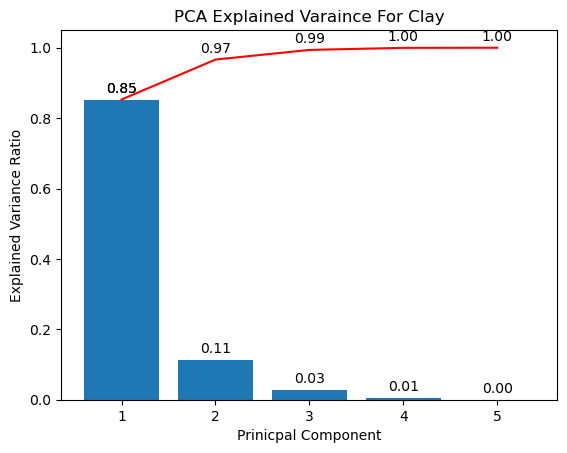

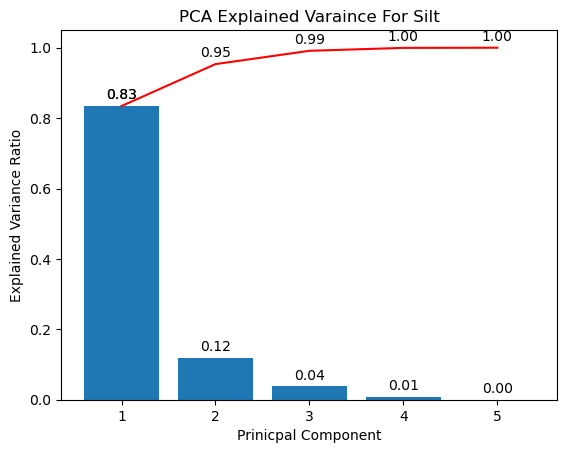

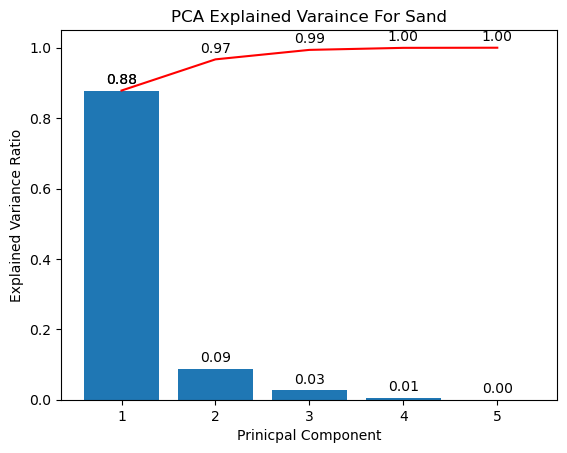

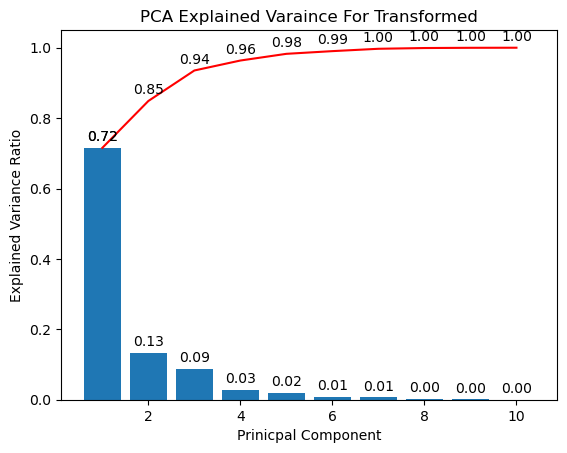

In [37]:
for name, cols in soil_col_sets.items():
    pca = PCA()
    pca.fit(soil[cols]) 
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    components = list(range(1, len(explained_var) + 1))
    plt.bar(components, explained_var)
    plt.plot(components, cum_var_exp, color = "red")
    
    for i in range(len(explained_var)):
        plt.annotate(
            "{:.2f}".format(explained_var[i]),
            (components[i], explained_var[i]),
            textcoords = "offset points",
            xytext = (0, 5),
            ha = "center"
        )
        plt.annotate(
            "{:.2f}".format(cum_var_exp[i]),
            (components[i], cum_var_exp[i]),
            textcoords = "offset points",
            xytext = (0, 5),
            ha = "center"
        )
    
    plt.title("PCA Explained Varaince For {}".format(name))
    plt.xlabel("Prinicpal Component")
    plt.ylabel("Explained Variance Ratio")
    
    plt.show()

In [47]:
soil_n_components = {
    "Clay": 2,
    "Silt": 2,
    "Sand": 2,
    "Transformed": 4
}

df_soil = pd.DataFrame({
    "Lat": soil["latitude"],
    "Long": soil["longitude"]
})
for key in soil_col_sets.keys():
    pca = PCA(soil_n_components[key])
    components = pca.fit_transform(soil[soil_col_sets[key]])
    for i in range(components.shape[1]):
        df_soil["{}_{}".format(key, i + 1)] = components[:,i]

display(df_soil.describe())
df_soil

,Lat,Long,Clay_1,Clay_2,Silt_1,Silt_2,Sand_1,Sand_2,Transformed_1,Transformed_2,Transformed_3,Transformed_4
count,3597.000000,3597.000000,3597.000000,3.597000e+03,3.597000e+03,3.597000e+03,3.597000e+03,3.597000e+03,3.597000e+03,3.597000e+03,3.597000e+03,3.597000e+03
mean,5.094969,-74.535983,0.000000,1.011392e-15,4.424842e-16,4.108782e-16,-3.792722e-15,-1.137817e-15,-6.321203e-17,-2.370451e-17,-7.901504e-17,6.913816e-17
std,3.238751,2.245669,37.745903,1.377313e+01,2.938849e+01,1.110566e+01,4.825313e+01,1.532482e+01,3.325117e+00,1.434275e+00,1.157059e+00,6.612441e-01
min,-4.157500,-78.930311,-67.004339,-5.884950e+01,-6.367967e+01,-4.382409e+01,-8.814611e+01,-6.926189e+01,-1.089390e+01,-5.188831e+00,-6.036437e+00,-5.757306e+00
25%,3.070182,-76.261740,-28.651365,-8.259231e+00,-2.059501e+01,-6.021560e+00,-3.873593e+01,-7.062010e+00,-2.113537e+00,-9.242118e-01,-6.519958e-01,-3.068083e-01
50%,4.829722,-75.069444,-3.983555,4.908019e-01,-3.018291e+00,-3.900707e-01,-4.613363e+00,4.924734e-01,2.344630e-02,-3.595730e-02,-8.018849e-03,9.095668e-03
75%,7.539351,-73.150560,23.677107,8.065704e+00,1.776192e+01,5.555351e+00,3.601853e+01,8.401828e+00,2.034379e+00,9.232812e-01,6.820771e-01,2.874378e-01
max,12.365633,-67.490242,141.886676,6.621003e+01,1.051975e+02,6.340822e+01,1.305294e+02,7.667261e+01,1.383559e+01,5.447476e+00,7.347418e+00,6.109785e+00


,Lat,Long,Clay_1,Clay_2,Silt_1,Silt_2,Sand_1,Sand_2,Transformed_1,Transformed_2,Transformed_3,Transformed_4
0,-0.570000,-72.470001,-54.398915,-2.889110,-54.777466,-0.296406,109.296339,1.197388,-4.993996,-2.654157,0.668825,-0.952213
1,-0.580000,-72.379997,14.570887,-22.870728,14.780159,-10.077841,-28.655336,12.639848,1.167342,0.056478,1.508727,-0.723154
2,-1.280000,-70.830002,-5.293610,-14.044022,-18.872780,0.572530,24.637805,14.225388,-0.625549,-1.103761,0.796431,-0.479593
3,1.262778,-77.289722,13.065132,2.573756,11.229119,0.618743,-24.342971,-1.535696,1.060915,0.190534,-0.152647,0.143197
4,1.116111,-77.427500,-0.849410,-16.097794,-7.178153,-14.743606,8.510411,1.220059,-0.234101,-0.753772,0.893537,-0.193484
...,...,...,...,...,...,...,...,...,...,...,...,...
3592,5.472748,-68.662856,-60.196988,1.444015,-4.061781,-8.509243,64.239520,-11.507169,-6.945454,1.845890,0.446922,-0.147392
3593,5.554294,-68.486588,-12.868578,-37.517434,61.632915,-26.815863,-47.820772,10.249619,-0.278459,1.696892,3.787426,-0.404279
3594,5.574345,-68.560311,-49.285704,5.072383,9.383225,-20.076266,39.849601,-26.511922,-4.445466,1.473629,-0.344503,-0.364776
3595,4.466251,-67.876136,-60.588251,-2.175535,-43.934071,5.391592,104.568362,6.028825,-7.017736,-0.586599,1.027365,-0.079447


In [52]:
df_soil.to_csv("../datasets/checkpoints/soil.csv", quoting = False, index = False)

## Merge

In [36]:
df_soil = soil.copy()
df_soil = df_soil.rename({
    "latitude": "Lat",
    "longitude": "Long"
}, axis = 1).drop("profile_identifier", axis = 1)
df_soil

,Lat,Long,clay.15.30.cm,silt.15.30.cm,sand.15.30.cm,trans_1.15.30.cm,trans_2.15.30.cm,clay.30.60.cm,silt.30.60.cm,sand.30.60.cm,...,clay.0.5.cm,silt.0.5.cm,sand.0.5.cm,trans_1.0.5.cm,trans_2.0.5.cm,clay.5.15.cm,silt.5.15.cm,sand.5.15.cm,trans_1.5.15.cm,trans_2.5.15.cm
0,-0.570000,-72.470001,7.7,4.8,87.5,2.434181,-0.460365,10.1,3.8,86.1,...,3.0,6.3,90.7,3.417662,0.753923,4.0,6.0,90.0,3.110619,0.402068
1,-0.580000,-72.379997,40.5,41.6,17.8,-0.820955,0.026863,46.4,37.0,16.6,...,16.3,38.3,45.4,1.021779,0.853415,28.5,39.5,32.0,0.115188,0.325509
2,-1.280000,-70.830002,32.8,22.4,44.8,0.311428,-0.382280,35.3,20.3,44.4,...,13.1,20.4,66.4,1.621965,0.443425,22.6,21.7,55.8,0.904447,-0.041690
3,1.262778,-77.289722,36.4,34.6,29.1,-0.223105,-0.050356,37.5,33.6,28.9,...,36.0,34.9,29.1,-0.211244,-0.030793,36.1,34.8,29.1,-0.213628,-0.034713
4,1.116111,-77.427500,23.0,33.7,43.3,0.635890,0.384150,43.4,18.5,38.1,...,22.3,31.4,46.3,0.731428,0.342901,21.8,32.5,45.7,0.742896,0.401350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3592,5.472748,-68.662856,4.0,29.9,66.1,2.805078,2.011114,4.0,24.6,71.4,...,4.0,31.9,64.1,2.774243,2.076124,4.0,31.5,64.5,2.780497,2.063436
3593,5.554294,-68.486588,18.4,62.0,19.5,0.059594,1.215032,36.8,49.8,13.4,...,5.4,69.4,25.1,1.529909,2.546794,8.3,67.9,23.9,1.063263,2.107207
3594,5.574345,-68.560311,10.3,37.4,52.3,1.620716,1.284612,8.3,27.0,64.7,...,9.9,43.5,46.6,1.553065,1.484115,10.0,42.2,47.8,1.566136,1.443118
3595,4.466251,-67.876136,3.4,13.1,83.6,3.208091,1.351306,5.1,13.3,81.5,...,1.9,5.2,92.9,3.905810,1.025654,2.3,7.6,90.1,3.682131,1.210856


In [76]:
df_rainfall = pd.read_csv("../datasets/checkpoints/rainfall_all.csv")
df_forest = pd.read_csv("../datasets/checkpoints/forest.csv")
df_soil = pd.read_csv("../datasets/checkpoints/soil.csv")

In [77]:
df_rainfall["Occurrence Date"] = pd.to_datetime(df_rainfall["Occurrence Date"])
df_rainfall["Month"] = df_rainfall["Occurrence Date"].dt.month
df_rainfall["Year"] = df_rainfall["Occurrence Date"].dt.year
df_rainfall.drop(
    ["Occurrence Date", "Department", "Municipality", 
     "Confidence ratio (km)", "Deaths", "Trigger", "Source"], 
    axis = 1,
    inplace = True
)
df_rainfall

,Lat,Long,Rain Yesterday,Rain Today,Landslide,Month,Year
0,4.63,-74.11,0.0,0.0,1,1,2010
1,5.01,-74.49,2.2,9.7,1,2,2010
2,5.11,-75.19,4.9,18.0,1,4,2010
3,3.40,-76.58,10.1,23.1,1,4,2010
4,4.63,-74.11,4.4,16.3,1,4,2010
...,...,...,...,...,...,...,...
1003,1.62,-77.14,5.2,1.0,0,5,2014
1004,5.39,-75.11,3.2,16.0,0,6,2010
1005,0.50,-77.24,0.0,3.0,0,9,2016
1006,6.65,-73.21,29.2,6.6,0,6,2010


In [78]:
df = pd.merge(
    df_rainfall,
    df_forest,
    on = "Year"
)
df

,Lat,Long,Rain Yesterday,Rain Today,Landslide,Month,Year,Forest Percentage
0,4.63,-74.11,0.0,0.0,1,1,2010,54.806480
1,5.01,-74.49,2.2,9.7,1,2,2010,54.806480
2,5.11,-75.19,4.9,18.0,1,4,2010,54.806480
3,3.40,-76.58,10.1,23.1,1,4,2010,54.806480
4,4.63,-74.11,4.4,16.3,1,4,2010,54.806480
...,...,...,...,...,...,...,...,...
1003,4.80,-75.80,2.6,8.2,1,12,2020,53.305011
1004,6.00,-75.05,0.0,0.0,1,12,2020,53.305011
1005,6.25,-75.58,0.0,0.0,1,12,2020,53.305011
1006,6.18,-75.61,0.0,0.0,1,12,2020,53.305011


In [79]:
indices = []
for i, row in df.iterrows():
    df_soil["Lat Distance"] = np.abs(df_soil["Lat"] - row["Lat"])
    df_soil["Long Distance"] = np.abs(df_soil["Long"] - row["Long"])
    df_soil["Distance"] = df_soil["Lat Distance"] + df_soil["Long Distance"]
    df_soil.sort_values("Distance", inplace = True)
    indices.append(df_soil.index[0])
    
df_soil.drop(
    ["Lat", "Long", "Lat Distance", "Long Distance", "Distance"],
    axis = 1, 
    inplace = True
)
df_soil.reset_index(inplace = True)
df["index"] = indices
# df = pd.merge(
#     df,
#     df_soil,
#     on = "index"
# )
df.drop(["index", "Year"], axis = 1, inplace = True)

df

,Lat,Long,Rain Yesterday,Rain Today,Landslide,Month,Forest Percentage
0,4.63,-74.11,0.0,0.0,1,1,54.806480
1,5.01,-74.49,2.2,9.7,1,2,54.806480
2,5.11,-75.19,4.9,18.0,1,4,54.806480
3,3.40,-76.58,10.1,23.1,1,4,54.806480
4,4.63,-74.11,4.4,16.3,1,4,54.806480
...,...,...,...,...,...,...,...
1003,4.80,-75.80,2.6,8.2,1,12,53.305011
1004,6.00,-75.05,0.0,0.0,1,12,53.305011
1005,6.25,-75.58,0.0,0.0,1,12,53.305011
1006,6.18,-75.61,0.0,0.0,1,12,53.305011


In [80]:
cols = [ x for x in df.columns if x not in  ["Landslide", "Lat", "Long", "Month"]]
scaler = StandardScaler()
df[cols] = scaler.fit_transform(df[cols])
df

,Lat,Long,Rain Yesterday,Rain Today,Landslide,Month,Forest Percentage
0,4.63,-74.11,-0.688526,-0.752257,1,1,0.932852
1,5.01,-74.49,-0.471202,0.310720,1,2,0.932852
2,5.11,-75.19,-0.204486,1.220277,1,4,0.932852
3,3.40,-76.58,0.309189,1.779162,1,4,0.932852
4,4.63,-74.11,-0.253878,1.033982,1,4,0.932852
...,...,...,...,...,...,...,...
1003,4.80,-75.80,-0.431688,0.146342,1,12,-2.385851
1004,6.00,-75.05,-0.688526,-0.752257,1,12,-2.385851
1005,6.25,-75.58,-0.688526,-0.752257,1,12,-2.385851
1006,6.18,-75.61,-0.688526,-0.752257,1,12,-2.385851


In [81]:
months = pd.get_dummies(df["Month"], dtype = np.float64, prefix = "Month")
df = pd.concat([ df, months ], axis = 1).drop("Month", axis = 1)
df

,Lat,Long,Rain Yesterday,Rain Today,Landslide,Forest Percentage,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,4.63,-74.11,-0.688526,-0.752257,1,0.932852,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.01,-74.49,-0.471202,0.310720,1,0.932852,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.11,-75.19,-0.204486,1.220277,1,0.932852,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.40,-76.58,0.309189,1.779162,1,0.932852,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.63,-74.11,-0.253878,1.033982,1,0.932852,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,4.80,-75.80,-0.431688,0.146342,1,-2.385851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1004,6.00,-75.05,-0.688526,-0.752257,1,-2.385851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1005,6.25,-75.58,-0.688526,-0.752257,1,-2.385851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1006,6.18,-75.61,-0.688526,-0.752257,1,-2.385851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [75]:
df.to_csv("../datasets/landslides_processed.csv", index = False)